## Data

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import imblearn
import collections
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from imblearn.over_sampling import ADASYN

In [2]:
df = pd.read_csv('/Users/claudiajovellar/code/AlcaRmsp/the_laundromat/raw_data/data.csv')

df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})

In [3]:
df['errorBalanceOrig']=df['newBalanceOrig'] + df['amount'] - df['oldBalanceOrig']
df['errorBalanceDest']=df['newBalanceDest'] + df['amount'] - df['oldBalanceDest']

In [4]:
from sklearn.preprocessing import OneHotEncoder

# Check unique values for streets (2)
print(f"The unique values for 'type' are {df.type.unique()}")

# Instantiate the OneHotEncoder
ohe_binary = OneHotEncoder(sparse = False, drop="if_binary") 

# Fit encoder
ohe_binary.fit(df[['type']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe_binary.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe_binary.get_feature_names_out()}")

# Transform the current "Street" column
df[ohe_binary.get_feature_names_out()] = ohe_binary.transform(df[['type']])

# Drop the column "Street" which has been encoded
df.drop(columns = ["type"], inplace = True)

The unique values for 'type' are ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


/Users/claudiajovellar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The categories detected by the OneHotEncoder are [array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype=object)]
The column names for the encoded values are ['type_CASH_IN' 'type_CASH_OUT' 'type_DEBIT' 'type_PAYMENT'
 'type_TRANSFER']


In [5]:
from sklearn.preprocessing import LabelEncoder
# create a label encoder object
le = LabelEncoder()

# apply the label encoder to non-numeric columns
df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])

In [6]:
df.head()

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0.0,9839.64,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0.0,1864.28,0.0,0.0,0.0,1.0,0.0
2,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0.0,181.00,0.0,0.0,0.0,0.0,1.0
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,0.0,-21001.00,0.0,1.0,0.0,0.0,0.0
4,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0.0,11668.14,0.0,0.0,0.0,1.0,0.0


### Split data

In [7]:
# Separate the features and target variable
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Balancing data

### SMOTE - Training Set

([<matplotlib.patches.Wedge at 0x14d3e6200>,
 [Text(-1.099990955625572, 0.004460666087110192, 'Not Fraud'),
  Text(1.0999909559371663, -0.004460589247970448, 'Fraud')])

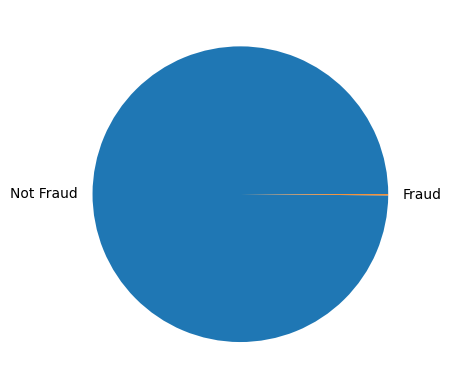

In [9]:
#Check if data is balanced before SMOTE
labels = 'Not Fraud','Fraud'
values=df['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels)

In [10]:
print(imblearn.__version__)

0.9.1


In [11]:
# summarize class distribution
counter = collections.Counter(y)
print(counter)

Counter({0: 6354407, 1: 8213})


In [12]:
X_train.shape, y_train.shape

((5090096, 16), (5090096,))

In [13]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [14]:
X_resampled.head()

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,619,386385.08,4449199,4669568.85,5055953.92,289167,506035.06,119649.98,0,772770.15,0.00,1.0,0.0,0.0,0.0,0.0
1,164,212458.78,5813773,234635.00,447093.78,204382,806037.88,593579.10,0,424917.56,0.00,1.0,0.0,0.0,0.0,0.0
2,382,19967.60,5870502,3634.00,0.00,1346491,0.00,0.00,0,16333.60,19967.60,0.0,0.0,0.0,1.0,0.0
3,180,527616.51,5095916,180216.00,0.00,446948,92157.10,619773.61,0,347400.51,1055233.02,0.0,1.0,0.0,0.0,0.0
4,36,206067.85,5557736,0.00,0.00,338417,2131494.48,2337562.32,0,206067.85,412135.69,0.0,0.0,0.0,0.0,1.0


In [15]:
X_resampled.shape, y_resampled.shape

((10167006, 16), (10167006,))

In [16]:
pd.DataFrame(y_resampled)

,isFraud
0,0
1,0
2,0
3,0
4,0
...,...
10167001,1
10167002,1
10167003,1
10167004,1


In [17]:
X_resampled['isFraud'] = y_resampled

([<matplotlib.patches.Wedge at 0x133fc1d20>,
 [Text(6.735557395310444e-17, 1.1, 'Not Fraud'),
  Text(-2.0206672185931328e-16, -1.1, 'Fraud')])

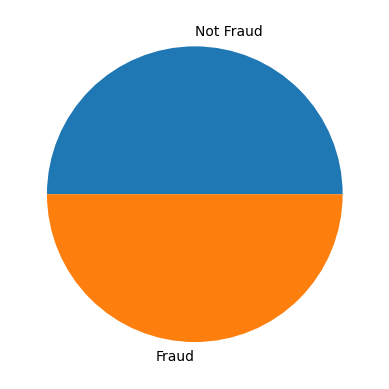

In [18]:
#Check if data is balanced after SMOTE balancing
labels = 'Not Fraud','Fraud'
values= X_resampled['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels)

([<matplotlib.patches.Wedge at 0x14a7b6a40>,
 [Text(6.735557395310444e-17, 1.1, 'Not Fraud'),
  Text(-2.0206672185931328e-16, -1.1, 'Fraud')])

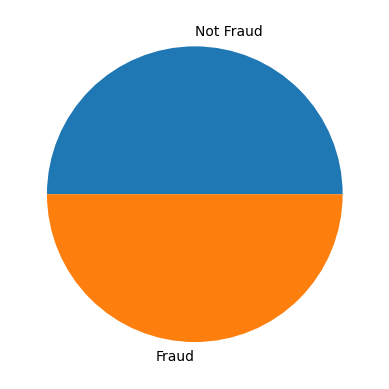

In [19]:
#Check if data is balanced after SMOTE balancing
import matplotlib.pyplot as plt
labels = 'Not Fraud','Fraud'
values=X_resampled['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels)

#### Getting a sample of the training data 

In [20]:
fraud = X_resampled[X_resampled.isFraud == 1].sample(100000)
fraud.head()

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
7008208,478,1.509662e+06,5437015,1.509662e+06,0.0,131516,0.000000e+00,1.509662e+06,0,0.0,3.019324e+06,0.0,1.0,0.0,0.0,0.0,1
8118055,127,8.765806e+06,1040942,8.765806e+06,0.0,320185,1.218009e+05,8.887607e+06,0,0.0,1.753161e+07,0.0,1.0,0.0,0.0,0.0,1
6596205,221,7.025545e+04,3789923,7.025545e+04,0.0,228032,0.000000e+00,7.025545e+04,0,0.0,1.405109e+05,0.0,1.0,0.0,0.0,0.0,1
5182152,469,2.380166e+04,3151837,2.380166e+04,0.0,511358,3.363827e+06,3.387629e+06,0,0.0,4.760333e+04,0.0,1.0,0.0,0.0,0.0,1
6214172,475,1.725549e+05,2902082,1.725549e+05,0.0,493687,0.000000e+00,0.000000e+00,0,0.0,1.725549e+05,0.0,0.0,0.0,0.0,1.0,1


In [21]:
notfraud = X_resampled[X_resampled.isFraud == 0].sample(100000)

In [22]:
data_new = pd.concat([fraud, notfraud], axis=0)
data_new

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
7008208,478,1.509662e+06,5437015,1.509662e+06,0.00,131516,0.000000e+00,1.509662e+06,0,0.00,3.019324e+06,0.0,1.0,0.0,0.0,0.0,1
8118055,127,8.765806e+06,1040942,8.765806e+06,0.00,320185,1.218009e+05,8.887607e+06,0,0.00,1.753161e+07,0.0,1.0,0.0,0.0,0.0,1
6596205,221,7.025545e+04,3789923,7.025545e+04,0.00,228032,0.000000e+00,7.025545e+04,0,0.00,1.405109e+05,0.0,1.0,0.0,0.0,0.0,1
5182152,469,2.380166e+04,3151837,2.380166e+04,0.00,511358,3.363827e+06,3.387629e+06,0,0.00,4.760333e+04,0.0,1.0,0.0,0.0,0.0,1
6214172,475,1.725549e+05,2902082,1.725549e+05,0.00,493687,0.000000e+00,0.000000e+00,0,0.00,1.725549e+05,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979193,161,7.602611e+04,3484596,0.000000e+00,76026.11,207107,2.697268e+05,1.937007e+05,0,152052.22,0.000000e+00,1.0,0.0,0.0,0.0,0.0,0
2697451,210,2.154797e+05,803932,1.423129e+07,14446765.72,21171,8.458871e+05,6.304074e+05,0,430959.40,1.164153e-10,1.0,0.0,0.0,0.0,0.0,0
177841,305,1.278952e+04,3439542,2.011300e+04,7323.48,1000577,0.000000e+00,0.000000e+00,0,0.00,1.278952e+04,0.0,0.0,0.0,1.0,0.0,0
3336653,276,2.362120e+04,411405,4.110000e+02,0.00,417558,2.677128e+06,2.700750e+06,0,23210.20,4.724240e+04,0.0,1.0,0.0,0.0,0.0,0


### SMOTE - Test test 50/50

In [23]:
Xtest_resampled50, ytest_resampled50 = SMOTE().fit_resample(X_test, y_test)

In [24]:
Xtest_resampled50.shape, ytest_resampled50.shape

((2541808, 16), (2541808,))

In [25]:
Xtest_resampled50.head()

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,278,330218.42,5144186,20866.00,351084.42,523341,452419.57,122201.15,0,660436.84,-5.820766e-11,1.0,0.0,0.0,0.0,0.0
1,15,11647.08,868156,30370.00,18722.92,1849210,0.00,0.00,0,0.00,1.164708e+04,0.0,0.0,0.0,1.0,0.0
2,10,152264.21,2453021,106589.00,258853.21,179836,201303.01,49038.80,0,304528.42,0.000000e+00,1.0,0.0,0.0,0.0,0.0
3,403,1551760.63,4162339,0.00,0.00,167013,3198359.45,4750120.08,0,1551760.63,3.103521e+06,0.0,0.0,0.0,0.0,1.0
4,206,78172.30,5740614,2921331.58,2999503.88,27202,415821.90,337649.60,0,156344.60,-5.820766e-11,1.0,0.0,0.0,0.0,0.0


In [26]:
Xtest_resampled50['isFraud'] = ytest_resampled50

### SMOTE - Test 70/30

In [27]:
Xtest_resampled70, ytest_resampled30 = SMOTE(sampling_strategy = 0.3).fit_resample(X_test, y_test)

In [28]:
Xtest_resampled70.shape, ytest_resampled30.shape

((1652175, 16), (1652175,))

In [29]:
Xtest_resampled70.head()

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,278,330218.42,5144186,20866.00,351084.42,523341,452419.57,122201.15,0,660436.84,-5.820766e-11,1.0,0.0,0.0,0.0,0.0
1,15,11647.08,868156,30370.00,18722.92,1849210,0.00,0.00,0,0.00,1.164708e+04,0.0,0.0,0.0,1.0,0.0
2,10,152264.21,2453021,106589.00,258853.21,179836,201303.01,49038.80,0,304528.42,0.000000e+00,1.0,0.0,0.0,0.0,0.0
3,403,1551760.63,4162339,0.00,0.00,167013,3198359.45,4750120.08,0,1551760.63,3.103521e+06,0.0,0.0,0.0,0.0,1.0
4,206,78172.30,5740614,2921331.58,2999503.88,27202,415821.90,337649.60,0,156344.60,-5.820766e-11,1.0,0.0,0.0,0.0,0.0


In [30]:
Xtest_resampled70['isFraud'] = ytest_resampled30

### 50/50 Getting a sample of the test data 

In [31]:
fraud_test = Xtest_resampled50[Xtest_resampled50.isFraud == 1].sample(17500)

In [32]:
notfraud_test = Xtest_resampled50[Xtest_resampled50.isFraud == 0].sample(17500)

In [33]:
data_new_test = pd.concat([fraud_test, notfraud_test], axis=0)
data_new_test

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
1386811,596,7.752761e+05,6252224,775276.090475,0.00,444209,0.000000e+00,0.000000e+00,0,0.00,7.752761e+05,0.0,0.0,0.0,0.0,1.0,1
1955573,383,1.905197e+05,1896197,190519.690301,0.00,376424,0.000000e+00,1.905197e+05,0,0.00,3.810394e+05,0.0,1.0,0.0,0.0,0.0,1
2391992,186,1.897911e+05,2849453,189791.128707,0.00,43397,0.000000e+00,0.000000e+00,0,0.00,1.897911e+05,0.0,0.0,0.0,0.0,1.0,1
2109001,58,3.802472e+05,3565671,380247.162809,0.00,46130,0.000000e+00,0.000000e+00,0,0.00,3.802472e+05,0.0,0.0,0.0,0.0,1.0,1
1437117,165,1.677435e+04,1906816,16774.345266,0.00,244402,1.145198e+06,1.161973e+06,0,0.00,3.354869e+04,0.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555168,590,7.558318e+06,5199042,0.000000,0.00,106427,1.176055e+07,1.931886e+07,0,7558318.04,1.511664e+07,0.0,0.0,0.0,0.0,1.0,0
97206,322,7.124278e+04,1790768,40922.000000,112164.78,399895,0.000000e+00,0.000000e+00,0,142485.56,7.124278e+04,1.0,0.0,0.0,0.0,0.0,0
630556,306,1.485045e+05,795183,0.000000,0.00,7465,9.808027e+05,1.129307e+06,0,148504.50,2.970090e+05,0.0,1.0,0.0,0.0,0.0,0
1215759,307,1.497098e+04,5804723,24455.280000,9484.30,2102336,0.000000e+00,0.000000e+00,0,0.00,1.497098e+04,0.0,0.0,0.0,1.0,0.0,0


In [34]:
X_test_SMOTE50 = data_new_test.drop('isFraud', axis=1)
y_test_SMOTE50 = data_new_test['isFraud']

### 70/30 getting a sample of the data

In [35]:
fraud_test7_3 = Xtest_resampled70[Xtest_resampled70.isFraud == 1].sample(10500)

In [36]:
notfraud_test7_3 = Xtest_resampled70[Xtest_resampled70.isFraud == 0].sample(24500)

In [37]:
X_test_SMOTE70 = data_new_test.drop('isFraud', axis=1)
y_test_SMOTE30 = data_new_test['isFraud']

## Modelling with SMOTE

### 50/50 Instantiate the Random Forest Classifier model

In [38]:
X_train1 = data_new.drop('isFraud', axis = 1)
y_train1 = data_new['isFraud']

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [40]:
#Train the model on the Training Data = X_resampled and y_resampled
model.fit(X_train1, y_train1)

RandomForestClassifier()

In [41]:
y_pred = model.predict(X_test_SMOTE50)

### 70/30 Instantiate the Random Forest Classifier model

In [42]:
y_pred_7_3 = model.predict(X_test_SMOTE70)

### 50/50 Score model on test data

In [43]:
# Score the model on the Test data
from sklearn.metrics import recall_score
recall = recall_score(y_test_SMOTE50, y_pred)
print("Recall:", recall)

Recall: 0.9971428571428571


### 70/30 Score model on test data

In [44]:
recall = recall_score(y_test_SMOTE30, y_pred_7_3)
print("Recall:", recall)

Recall: 0.9971428571428571


## Rebalancing with ADASYN

In [ ]:
X_resampled_ADASYN, y_resampled_ADASYN = ADASYN().fit_resample(X_train, y_train)

In [ ]:
X_resampled_ADASYN['isFraud'] = y_resampled_ADASYN

In [ ]:
#Check if data is balanced after ADASYN balancing
import matplotlib.pyplot as plt
labels = 'Not Fraud','Fraud'
values=X_resampled_ADASYN['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels)

### Getting a sample

In [ ]:
fraud_A = X_resampled_ADASYN[X_resampled_ADASYN.isFraud == 1].sample(100000)
notfraud_A =X_resampled_ADASYN[X_resampled_ADASYN.isFraud == 0].sample(100000)

In [ ]:
data_new_A = pd.concat([fraud, notfraud], axis=0)

## Modelling with ADASYN

### Intantiate the Random Forest Classifier model

In [ ]:
X_train_A = data_new_A.drop('isFraud', axis = 1)
y_train_A = data_new_A['isFraud']

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train_A, y_train_A)

In [ ]:
y_pred_A = model.predict(X_test)

### Score model on test data

In [ ]:
# Score the model on the Test data
recall_A = recall_score(y_test, y_pred)
print("Recall:", recall)

## Feature Importance

### SMOTE

In [ ]:
from sklearn.inspection import permutation_importance
RFC_model = RandomForestClassifier().fit(X_train1, y_train1) # Fit model
permutation_score = permutation_importance(RFC_model, X_train1, y_train1, n_repeats=10, scoring = 'recall') # Perform Permutation"
importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T) # Unstack results"
importance_df.columns=['feature','score_decrease']
importance_df.sort_values(by='score_decrease', ascending = False) # Order by importance"

### ADYSN

In [ ]:
RFC_model = RandomForestClassifier().fit(X_train1, y_train1) # Fit model
permutation_score = permutation_importance(RFC_model, X_train_A, y_train_A, n_repeats=10, scoring = 'recall') # Perform Permutation"
importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T) # Unstack results"
importance_df.columns=['feature','score_decrease']
importance_df.sort_values(by='score_decrease', ascending = False) # Order by importance"